<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/telecom_case_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Settings

## Libraries

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
sklearn.set_config(transform_output='pandas')

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


## Functions

In [ ]:
def calculate_metrics(model, X, y):

  y_pred = model.predict(X)

  model_metrics = {
      'accuracy': metrics.accuracy_score(y, y_pred),
      'balanced_accuracy': metrics.balanced_accuracy_score(y, y_pred),
      'precision': metrics.precision_score(y, y_pred),
      'recall': metrics.recall_score(y, y_pred),
      'f1': metrics.f1_score(y, y_pred),
  }

  try:
    y_pred_proba = model.predict_proba(X)[:,1]
    model_metrics['roc-auc'] = metrics.roc_auc_score(y, y_pred_proba)
    return model_metrics
  except:
    return model_metrics

## Load dataset

In [ ]:
df = pd.read_csv('Telecom_Churn.xls', index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

## Basic checks

In [ ]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

22

In [ ]:
df[df.duplicated(keep=False)].sort_values(df.columns.tolist())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9728-FTTVZ,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.2,Yes
7660-HDPJV,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.2,Yes
4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
0328-GRPMV,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
9985-MWVIX,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
2866-IKBTM,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
7721-DVEKZ,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
NUMERICAL_FEATURES = ['tenure','MonthlyCharges','TotalCharges']
CATEGORICAL_FEATURES = [col for col in df.columns if col not in NUMERICAL_FEATURES+['Churn']] # list comprehension

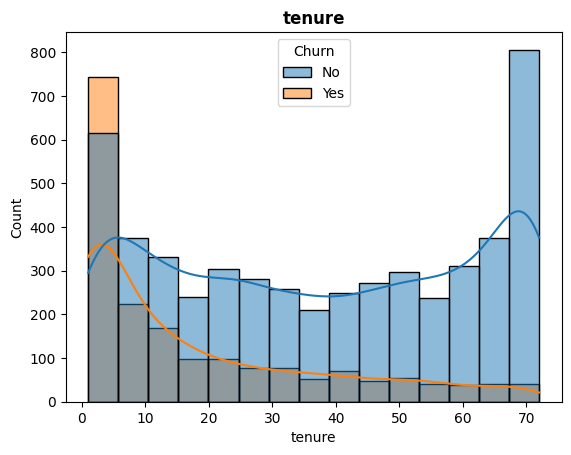

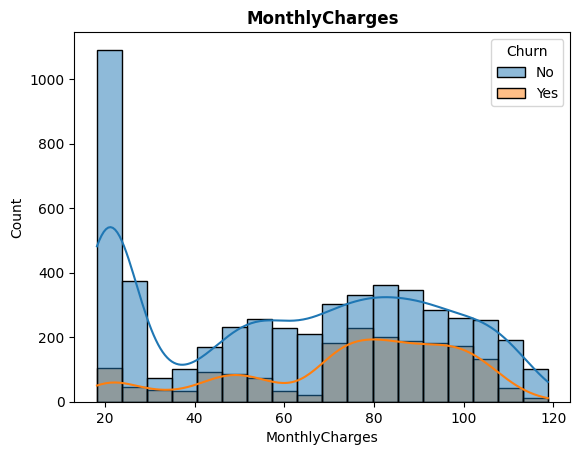

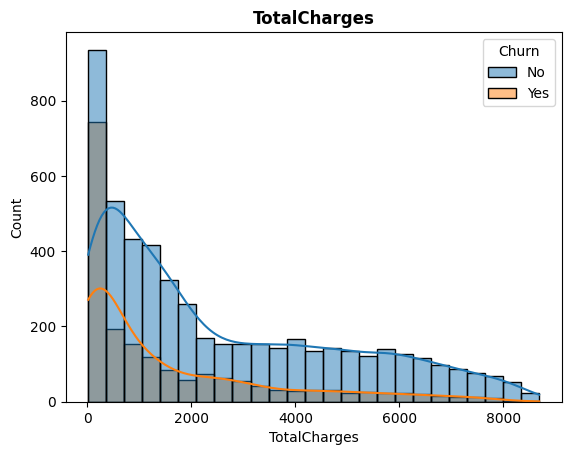

In [ ]:
for numeric_feature in NUMERICAL_FEATURES:
  sns.histplot(data=df, x=numeric_feature, kde=True, hue='Churn')
  plt.title(numeric_feature, weight='bold')
  plt.show()

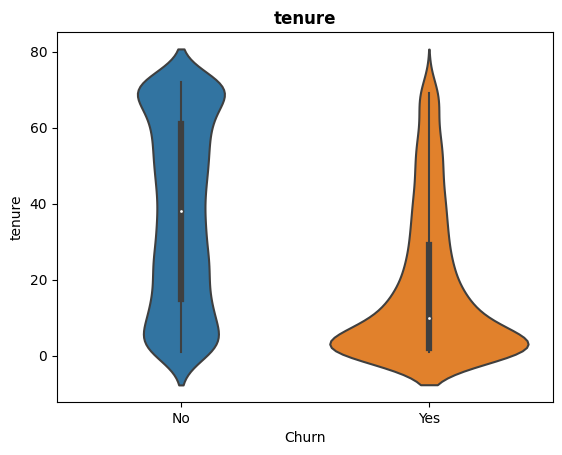

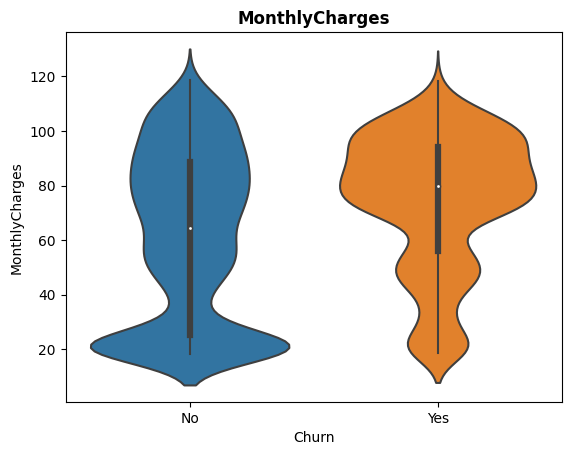

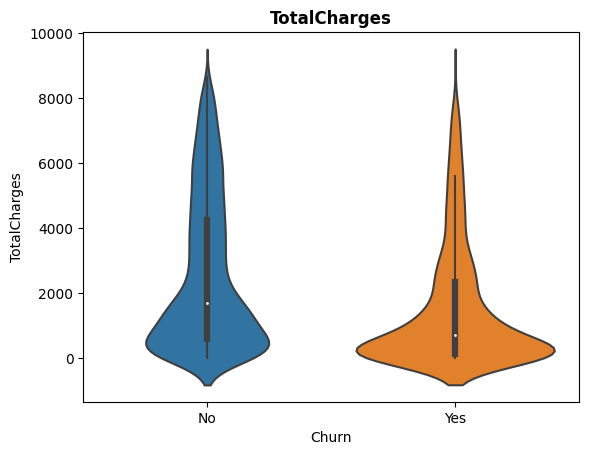

In [ ]:
for numeric_feature in NUMERICAL_FEATURES:
  sns.violinplot(data=df, x='Churn', y=numeric_feature)
  plt.title(numeric_feature, weight='bold')
  plt.show()

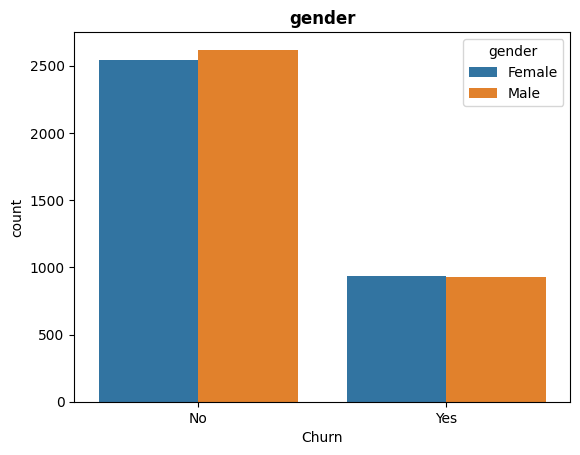

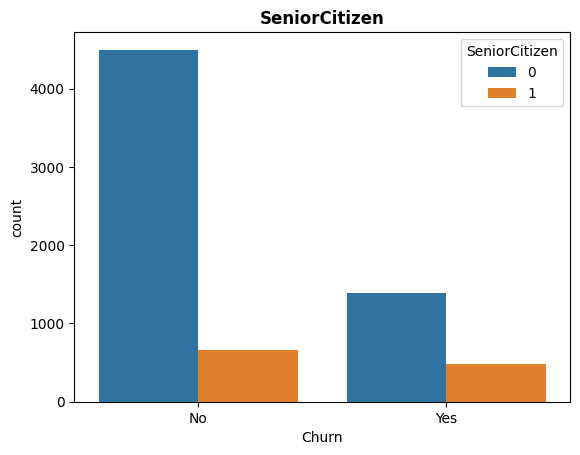

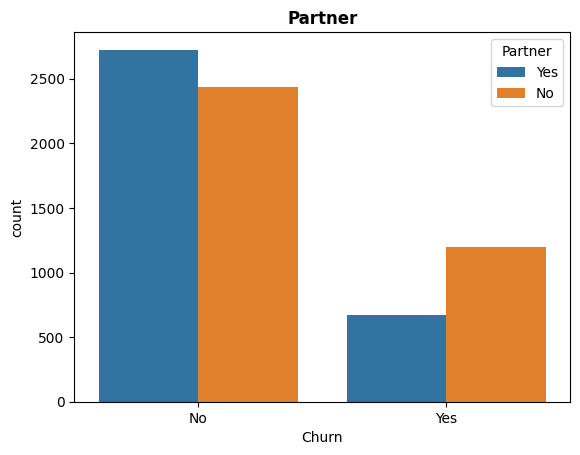

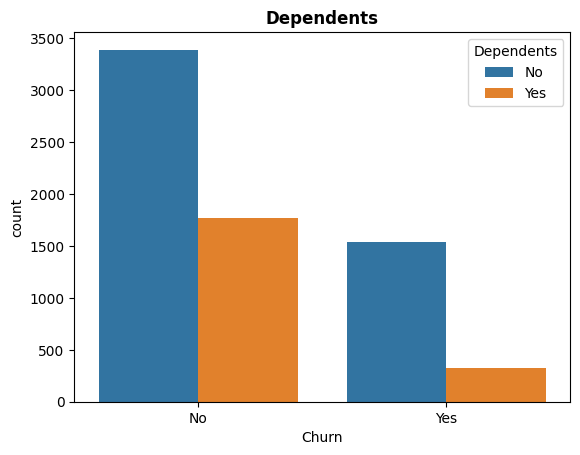

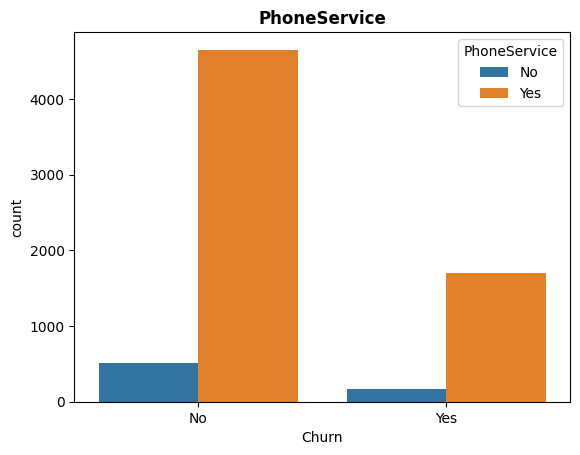

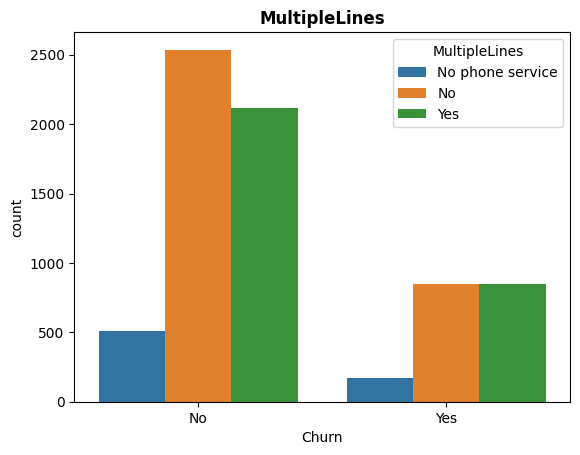

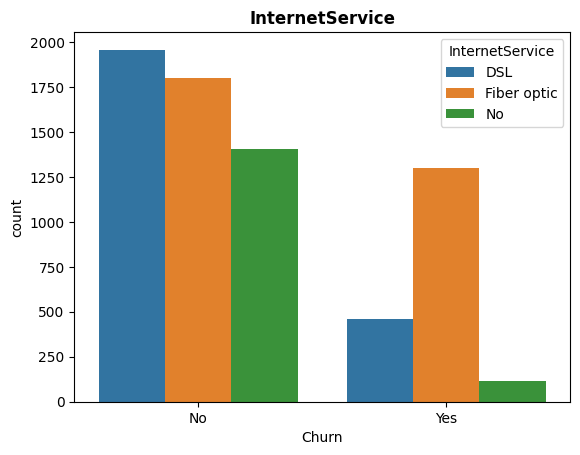

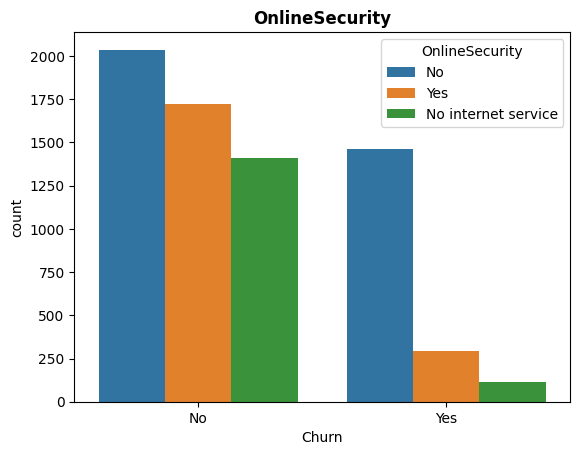

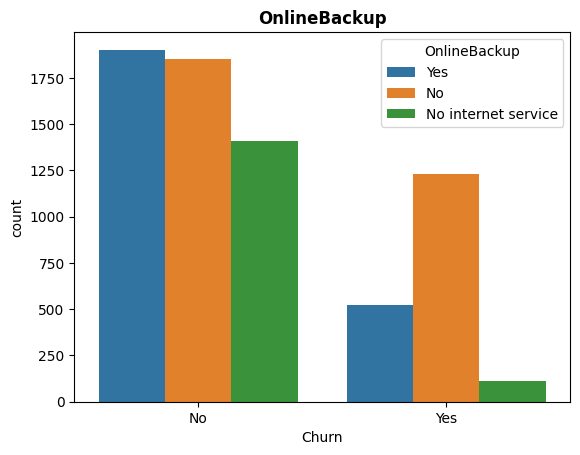

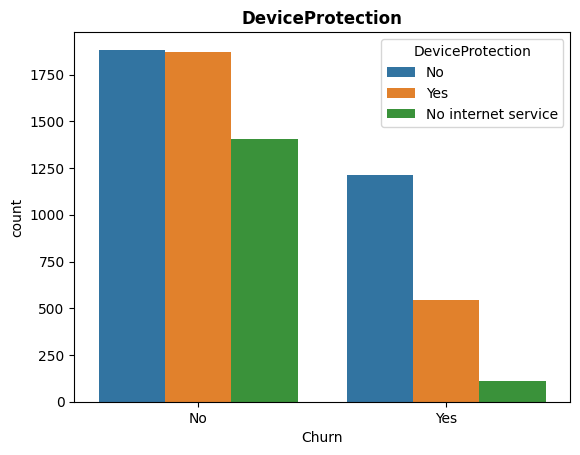

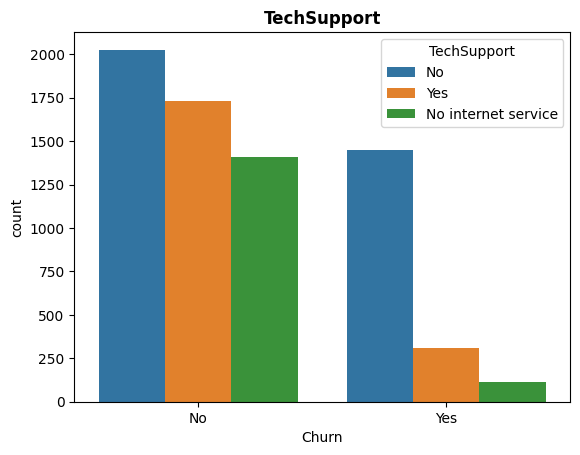

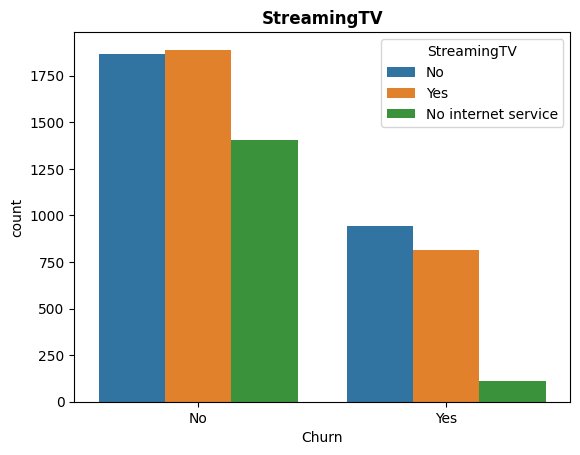

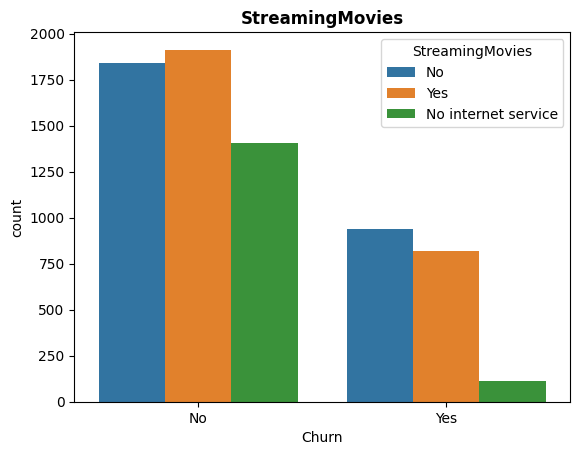

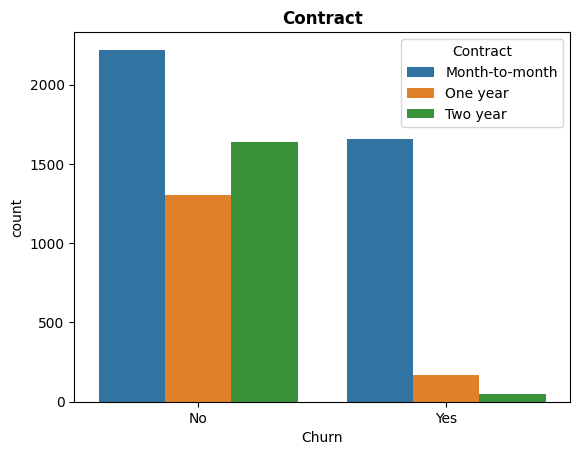

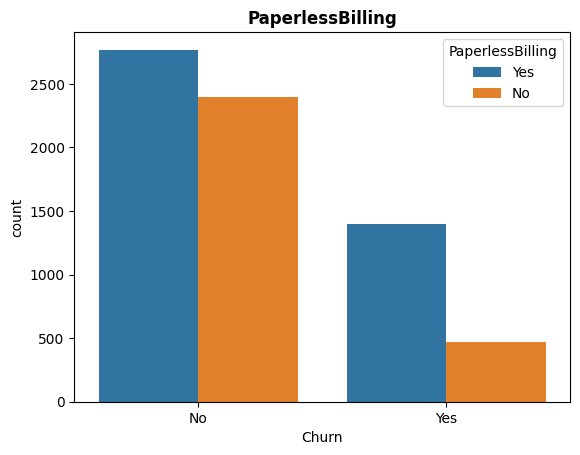

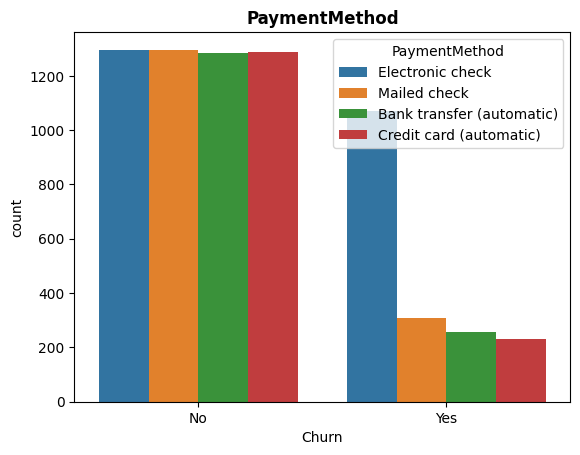

In [ ]:
for categorical_feature in CATEGORICAL_FEATURES:
  sns.countplot(data=df, x='Churn', hue=categorical_feature)
  plt.title(categorical_feature, weight='bold')
  plt.show()

In [ ]:
from scipy import stats

In [ ]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
feature = 'tenure'

a = df.loc[df.Churn=='No','tenure']
b = df.loc[df.Churn=='Yes','tenure']

stats.ttest_ind(a, b)

Ttest_indResult(statistic=31.741289063447653, pvalue=9.437650217574845e-207)

In [ ]:
ttest_results = {}

for feature in NUMERICAL_FEATURES:
  a = df.loc[df.Churn=='No',feature]
  b = df.loc[df.Churn=='Yes',feature]
  pvalue = stats.ttest_ind(a, b).pvalue
  ttest_results[feature] = pvalue

ttest_results

{'tenure': 9.437650217574845e-207,
 'MonthlyCharges': 6.760843117980302e-60,
 'TotalCharges': 4.876865689694505e-64}

In [ ]:
pd.DataFrame([ttest_results]).T.round(5)

,0
tenure,0.0
MonthlyCharges,0.0
TotalCharges,0.0


In [ ]:
df_contingency = pd.crosstab(df.Contract, df.Churn)
df_contingency

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


7.326182186265472e-257

In [ ]:
chi2_results = {}

for feature in CATEGORICAL_FEATURES:
  df_contingency = pd.crosstab(df[feature], df.Churn)
  pvalue = stats.chi2_contingency(df_contingency).pvalue
  chi2_results[feature] = pvalue

chi2_results

{'gender': 0.4904884707065509,
 'SeniorCitizen': 2.4792557203954705e-36,
 'Partner': 3.97379757451591e-36,
 'Dependents': 2.0196592017051303e-42,
 'PhoneService': 0.34992398942431924,
 'MultipleLines': 0.0035679273999811405,
 'InternetService': 5.831198962237274e-159,
 'OnlineSecurity': 1.4006867477839222e-184,
 'OnlineBackup': 7.776099238804965e-131,
 'DeviceProtection': 1.9593887862403176e-121,
 'TechSupport': 7.407807748843711e-180,
 'StreamingTV': 1.324641113169159e-81,
 'StreamingMovies': 5.353560421401324e-82,
 'Contract': 7.326182186265472e-257,
 'PaperlessBilling': 8.236203353962564e-58,
 'PaymentMethod': 1.4263098511063342e-139}

In [ ]:
pd.Series(chi2_results).to_frame('pvalue').sort_values('pvalue').round(8).style.background_gradient()

,pvalue
Contract,0.000000
OnlineSecurity,0.000000
TechSupport,0.000000
InternetService,0.000000
PaymentMethod,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
StreamingMovies,0.000000
StreamingTV,0.000000
PaperlessBilling,0.000000


In [ ]:
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate

In [ ]:
NUMERICAL_FEATURES = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
    ]

CATEGORICAL_FEATURES = [
  # 'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  # 'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'
]

FEATURES = NUMERICAL_FEATURES+CATEGORICAL_FEATURES
TARGET = 'Churn'

In [ ]:
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df[TARGET])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,,,
4510-HIMLV,1,69.80,69.80,0,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5206-XZZQI,53,80.60,4348.10,0,No,No,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check
3694-GLTJM,5,19.65,92.05,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
7384-GHBPI,3,35.15,99.75,0,Yes,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
2883-ILGWO,57,104.90,5913.95,1,No,No,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137-JOPHL,50,89.70,4304.50,0,No,No,No,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic)
2150-WLKUW,40,63.90,2635.00,0,Yes,No,Yes,DSL,No,Yes,No,No,Yes,No,One year,No,Bank transfer (automatic)
5478-JJVZK,33,60.90,2033.85,0,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
# List com tuplas, onde, cada tupla, tem os 3 seguintes elementos:
# nome - transformador - variaveis

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), NUMERICAL_FEATURES),
    ('onehot', OneHotEncoder(sparse_output=False, drop='if_binary', handle_unknown='ignore'), CATEGORICAL_FEATURES)
])

# Modeling

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7032, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics

In [ ]:
# Lista com tuplas, onde, cada tupla, tem os 2 seguintes elementos:
# nome - transformador/estimador
model_pipeline = Pipeline([
    ('preprocessador', preprocessor),
    ('modelo', LogisticRegression())
])

model_pipeline

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('modelo', LogisticRegression())])

In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('modelo', LogisticRegression())])

In [ ]:
model_pipeline.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
calculate_metrics(model_pipeline, X_test, y_test)

{'accuracy': 0.8043230944254836,
 'balanced_accuracy': 0.7222265023112481,
 'precision': 0.6487179487179487,
 'recall': 0.55,
 'f1': 0.5952941176470589,
 'roc-auc': 0.8415706437998259}

In [ ]:
models = {
    'dummy': DummyClassifier(),
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier()
}

In [ ]:
model_pipeline.set_params(modelo=RandomForestClassifier())

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('modelo', RandomForestClassifier())])

In [ ]:
cv_results = []

for model_name, model in models.items():
  print(model_name)
  model_pipeline.set_params(modelo=model)
  cv = cross_validate(model_pipeline, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy','precision', 'recall','roc_auc'])
  cv_result = pd.DataFrame(cv).mean().to_frame(model_name).T
  cv_results.append(cv_result)

df_cv_results = pd.concat(cv_results)
df_cv_results.sort_values('test_recall', ascending=False)

dummy
lr
rf
gbc


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc
lr,0.136268,0.056885,0.802997,0.655139,0.555715,0.846397
gbc,1.824866,0.091112,0.801096,0.664665,0.515931,0.845578
rf,0.854966,0.150438,0.790670,0.640105,0.494675,0.821049
dummy,0.058741,0.050507,0.732840,0.000000,0.000000,0.500000


In [ ]:
models = {
    'dummy': DummyClassifier(),
    'lr': LogisticRegression(class_weight='balanced'),
    'rf': RandomForestClassifier(class_weight='balanced'),
    'gbc': GradientBoostingClassifier()
}

cv_results = []

for model_name, model in models.items():
  print(model_name)
  model_pipeline.set_params(modelo=model)
  cv = cross_validate(model_pipeline, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy','precision', 'recall', 'roc_auc'])
  cv_result = pd.DataFrame(cv).mean().to_frame(model_name).T
  cv_results.append(cv_result)

df_cv_results = pd.concat(cv_results)
df_cv_results.sort_values('test_recall', ascending=False)

dummy
lr
rf
gbc


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc
lr,0.253905,0.089271,0.748958,0.519746,0.807670,0.846130
gbc,1.484822,0.084015,0.801096,0.664903,0.515219,0.845590
rf,1.362671,0.165425,0.790101,0.639711,0.489687,0.822187
dummy,0.117298,0.082870,0.732840,0.000000,0.000000,0.500000


Versão final

In [ ]:
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), NUMERICAL_FEATURES),
    ('onehot', OneHotEncoder(sparse_output=False, drop='if_binary', handle_unknown='ignore'), CATEGORICAL_FEATURES)
])

model_pipeline = Pipeline([
    ('preprocessador', preprocessor),
    ('modelo', LogisticRegression(class_weight='balanced'))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('modelo', LogisticRegression(class_weight='balanced'))])

In [ ]:
calculate_metrics(model_pipeline, X_test, y_test)

{'accuracy': 0.742320819112628,
 'balanced_accuracy': 0.7581329135124271,
 'precision': 0.5048543689320388,
 'recall': 0.7913043478260869,
 'f1': 0.6164267569856053,
 'roc-auc': 0.8415371474509277}

In [ ]:
from yellowbrick.classifier import (
    classification_report,
    confusion_matrix,
    roc_auc
)

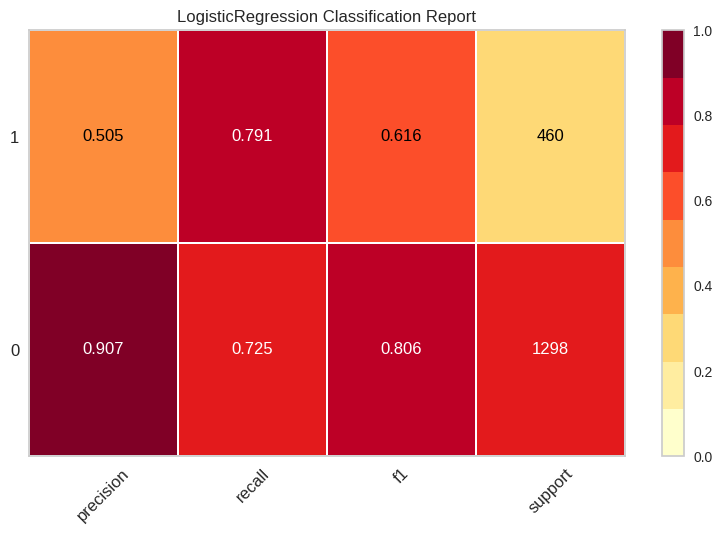

ClassificationReport(ax=<Axes: title={'center': 'LogisticRegression Classification Report'}>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fa3de887f10>,
                     estimator=Pipeline(steps=[('preprocessador',
                                                ColumnTransformer(transformers=[('scaler',
                                                                                 StandardScaler(),
                                                                                 ['tenure',
                                                                                  'MonthlyCharges',
                                                                                  'TotalCharges']),
                                                                                ('onehot',
                                                                                 OneHotEncoder(drop='if_binary',
                                                                                               handle_unknown='ignore',
                                                                                               sparse_output=False),
                                                                                 ['SeniorCitizen',
                                                                                  'Partner',
                                                                                  'Dependents',
                                                                                  'MultipleLines',
                                                                                  'InternetService',
                                                                                  'OnlineSecurity',
                                                                                  'OnlineBackup',
                                                                                  'DeviceProtection',
                                                                                  'TechSupport',
                                                                                  'StreamingTV',
                                                                                  'StreamingMovies',
                                                                                  'Contract',
                                                                                  'PaperlessBilling',
                                                                                  'PaymentMethod'])])),
                                               ('modelo',
                                                LogisticRegression(class_weight='balanced'))]),
                     support=True)

In [ ]:
classification_report(model_pipeline, X_train, y_train, X_test, y_test, support=True)

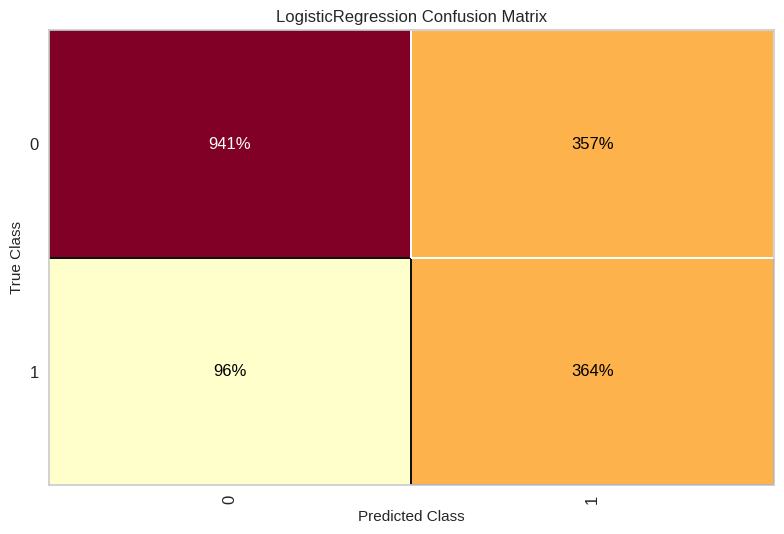

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fa3daceeb90>,
                estimator=Pipeline(steps=[('preprocessador',
                                           ColumnTransformer(transformers=[('scaler',
                                                                            StandardScaler(),
                                                                            ['tenure',
                                                                             'MonthlyCharges',
                                                                             'TotalCharges']),
                                                                           ('onehot',
                                                                            OneHotEnc...p='if_binary',
                                                                                          handle_unknown='ignore',
                                                                                          sparse_output=False),
                                                                            ['SeniorCitizen',
                                                                             'Partner',
                                                                             'Dependents',
                                                                             'MultipleLines',
                                                                             'InternetService',
                                                                             'OnlineSecurity',
                                                                             'OnlineBackup',
                                                                             'DeviceProtection',
                                                                             'TechSupport',
                                                                             'StreamingTV',
                                                                             'StreamingMovies',
                                                                             'Contract',
                                                                             'PaperlessBilling',
                                                                             'PaymentMethod'])])),
                                          ('modelo',
                                           LogisticRegression(class_weight='balanced'))]),
                percent=0.2)

In [ ]:
confusion_matrix(model_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
y_pred_proba = model_pipeline.predict_proba(X_test)[:,1]
y_pred_proba

array([0.00797095, 0.28063007, 0.18119886, ..., 0.85276799, 0.33306993,
       0.86583956])

In [ ]:
y_pred = y_pred_proba>.3

In [ ]:
metrics.recall_score(y_test, y_pred)

0.9391304347826087

In [ ]:
metrics.precision_score(y_test, y_pred)

0.42645607107601186

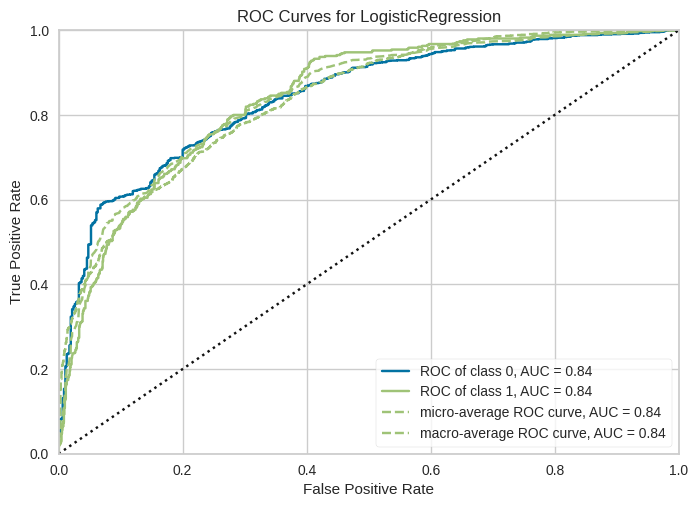

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=Pipeline(steps=[('preprocessador',
                                  ColumnTransformer(transformers=[('scaler',
                                                                   StandardScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechSupport',
                                                                    'StreamingTV',
                                                                    'StreamingMovies',
                                                                    'Contract',
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod'])])),
                                 ('modelo',
                                  LogisticRegression(class_weight='balanced'))]))

In [ ]:
roc_auc(model_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
  pickle.dump(model_pipeline, file)

In [ ]:
model_pipeline

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('modelo', LogisticRegression(class_weight='balanced'))])

In [ ]:
96 / (364+96)

0.20869565217391303